In [9]:
import os

import pandas as pd
import matplotlib.pyplot as plt

from util import stopwords, viet_tokenize, draw_wordcloud

from sklearn.feature_extraction.text import TfidfVectorizer

# Read Coprus

In [2]:
corpus_path = os.path.join('..', 'Corpus')
topics = os.listdir(corpus_path)
data = []
for topic in topics:
    for file in os.listdir(os.path.join(corpus_path, topic)):
        with open(os.path.join(corpus_path, topic, file), encoding='utf-8') as txt_file:
            link = txt_file.readline()[:-1]
            article = txt_file.read()
        data.append((file[:3], link, article, topic))

data = pd.DataFrame(data, columns=['article_index', 'link', 'article', 'topic'])

# EDA

In [10]:
topics = data['topic'].unique()

<Axes: >

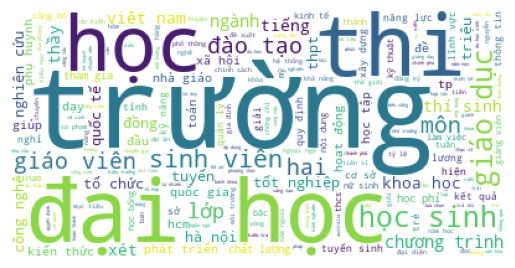

In [12]:
draw_wordcloud(data[data['topic'] == topics[0]]['article'], plt.gca(),
               background_color='white')

<Axes: >

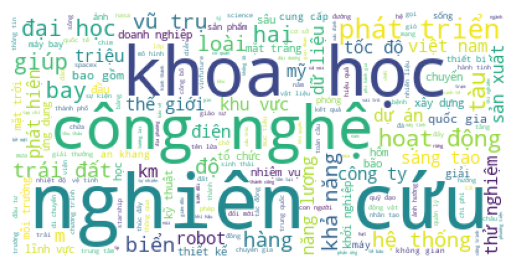

In [13]:
draw_wordcloud(data[data['topic'] == topics[1]]['article'], plt.gca(),
               background_color='white')

<Axes: >

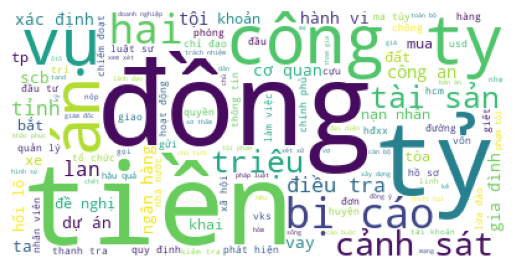

In [14]:
draw_wordcloud(data[data['topic'] == topics[2]]['article'], plt.gca(),
               background_color='white')

<Axes: >

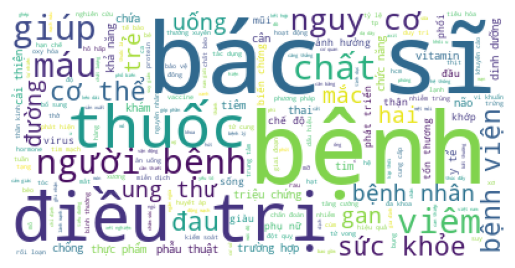

In [15]:
draw_wordcloud(data[data['topic'] == topics[3]]['article'], plt.gca(),
               background_color='white')

<Axes: >

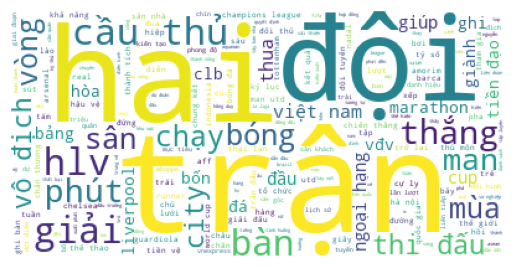

In [16]:
draw_wordcloud(data[data['topic'] == topics[4]]['article'], plt.gca(),
               background_color='white')

In [22]:
articles_words = data['article'].apply(lambda s: len(viet_tokenize(s)))
print(f"Tổng số từ: {articles_words.sum()}")
print(f"Độ dài văn bản ngắn nhất: {articles_words.min()}")
print(f"Độ dài văn bản dài nhất: {articles_words.max()}")
print(f"Trung bình độ dài văn bản: {articles_words.mean()}")
print(f"Trung vị độ dài văn bản: {articles_words.median()}")
print(f"Độ lệch chuẩn độ dài văn bản: {articles_words.std()}")

Tổng số từ: 1204470
Độ dài văn bản ngắn nhất: 151
Độ dài văn bản dài nhất: 3226
Trung bình độ dài văn bản: 495.25904605263156
Trung vị độ dài văn bản: 417.0
Độ lệch chuẩn độ dài văn bản: 275.330007892318


# Feature Extraction

In [3]:
vectoriser = TfidfVectorizer(tokenizer=viet_tokenize, stop_words=stopwords,
                             ngram_range=(1,3), min_df=.05, max_df=.7)
tfidf_feat = vectoriser.fit_transform(data['article'])
features_df = pd.DataFrame(tfidf_feat.toarray(), columns=vectoriser.get_feature_names_out())

d:\!Projects\Python\!NLP\.NLP_env\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [4]:
print(features_df.shape)
features_df

(2432, 675)


,a,an,an khang,an toàn,australia,ban,ban đầu,bao gồm,bay,biến,...,đội tuyển,động vật,đợt,đức,đứng,ưu tiên,ảnh,ảnh hưởng,ổn định,ứng dụng
0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,0.000000,0.00000,0.0,0.0,0.000000,0.033343,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.038338,0.000000,0.028750,0.0,0.000000,0.0,0.034306,0.0
2,0.000000,0.00000,0.0,0.0,0.000000,0.150148,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.064733,0.0,0.000000,0.0,0.077241,0.0
3,0.000000,0.00000,0.0,0.0,0.117785,0.000000,0.0,0.04111,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.041474,0.0,0.000000,0.0,0.000000,0.0
4,0.215921,0.05256,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.047805,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
2428,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,...,0.000000,0.0,0.000000,0.066099,0.028937,0.0,0.000000,0.0,0.000000,0.0
2429,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,...,0.154581,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
2430,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,...,0.234027,0.0,0.000000,0.000000,0.085155,0.0,0.000000,0.0,0.000000,0.0


# Save vectoriser and preprocessed data for clustering

In [6]:
from pathlib import Path

import joblib

temp_result_dir = os.path.join('.', 'temp')
if not os.path.exists(temp_result_dir): Path(temp_result_dir).mkdir()

data.to_csv(os.path.join(temp_result_dir, 'data.csv'), index=False)
features_df.to_csv(os.path.join(temp_result_dir, 'features.csv'), index=False)

joblib.dump(vectoriser, os.path.join('..', 'Output', 'tfidf_vec.pkl'))

['..\\Output\\tfidf_vec.pkl']